In [63]:
import numpy as np
import pandas as pd

In [64]:
data=pd.read_csv("Restaurant_Reviews.tsv",delimiter='\t',quoting=3)


In [65]:
data.shape

(1000, 2)

In [66]:
data.columns

Index(['Review', 'Liked'], dtype='object')

In [67]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [69]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [70]:
corpus=[]
for i in range(0,1000):
    review=re.sub(pattern='[^a-zA-Z]',repl=' ',string=data['Review'][i])
    review=review.lower()
    review_words=review.split()
    review_words=[word for word in review_words if not word in set(stopwords.words('english'))]
    ps=PorterStemmer()
    review=[ps.stem(word) for word in review_words]
    review=' '.join(review)
    corpus.append(review)

In [71]:
corpus[:1500]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [72]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1500)
X=cv.fit_transform(corpus).toarray()
y=data.iloc[:,1].values

In [89]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.3,random_state=42)

In [90]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((300, 1500), (700, 1500), (300,), (700,))

In [91]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(X_train,y_train)

MultinomialNB()

In [92]:
y_pred=classifier.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,

In [93]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

score1=accuracy_score(y_test,y_pred)
score2=precision_score(y_test,y_pred)
score3=recall_score(y_test,y_pred)

print("-----SCORE-----")
print("Accuracy Score is: {}%".format(round(score1*100,2)))
print("Precision Score is: {}%".format(round(score2*100,2)))
print("Recall Score is: {}%".format(round(score3*100,2)))

-----SCORE-----
Accuracy Score is: 74.0%
Precision Score is: 71.17%
Recall Score is: 80.17%


In [94]:
from sklearn import linear_model
classifier = linear_model.LogisticRegression(C=1.5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2*100,2))
print("Recall is ",round(score3*100,2))

Confusion Matrix:
 [[263  89]
 [ 96 252]]


Accuracy is  73.57 %
Precision is  73.9
Recall is  72.41


In [95]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

cm

In [96]:
cm

array([[263,  89],
       [ 96, 252]], dtype=int64)

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(95.72222222222221, 0.5, 'Actual Value')

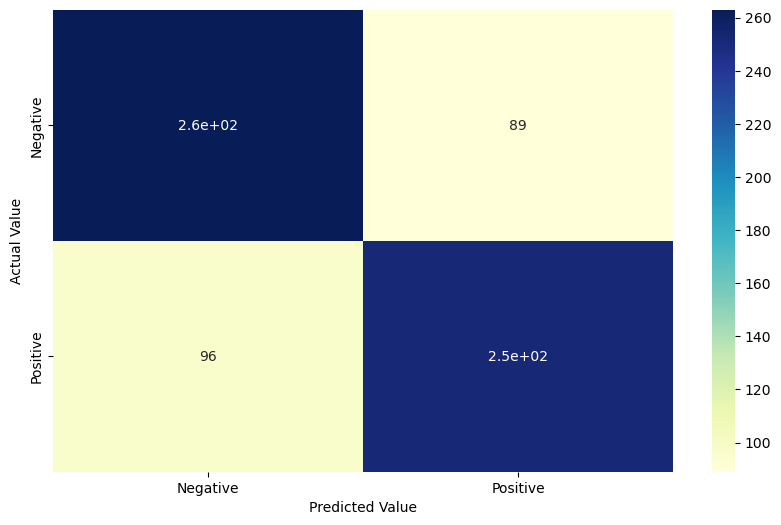

In [98]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,cmap='YlGnBu',xticklabels=['Negative','Positive'],yticklabels=['Negative','Positive'])
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

In [99]:
best_accuracy=0.0
alpha_val=0.0
for i in np.arange(0.1,1.1,0.1):
    temp_classifier=MultinomialNB(alpha=i)
    temp_classifier.fit(X_train,y_train)
    temp_y_pred=temp_classifier.predict(X_test)
    score=accuracy_score(y_test,temp_y_pred)
    print("Accuracy score for aplha {} = {}%".format(round(i,1),round(score*100,2)))
    if score>best_accuracy:
        best_accuracy=score
        aplha_val=1
print("-----------------------------------------------------------")
print("The best accuracy is {}% with apha value as {}".format(round(best_accuracy*100,2),round(aplha_val,1)))
    

Accuracy score for aplha 0.1 = 73.43%
Accuracy score for aplha 0.2 = 73.29%
Accuracy score for aplha 0.3 = 73.86%
Accuracy score for aplha 0.4 = 74.0%
Accuracy score for aplha 0.5 = 74.14%
Accuracy score for aplha 0.6 = 74.0%
Accuracy score for aplha 0.7 = 74.14%
Accuracy score for aplha 0.8 = 73.71%
Accuracy score for aplha 0.9 = 74.14%
Accuracy score for aplha 1.0 = 74.0%
-----------------------------------------------------------
The best accuracy is 74.14% with apha value as 1


In [100]:
classifier=MultinomialNB(alpha=0.2)
classifier.fit(X_train,y_train)

MultinomialNB(alpha=0.2)

In [101]:
def predict_sentiments(sample_review):
    sample_review=re.sub(pattern='[^a-zA-Z]',repl=' ',string=sample_review)
    sample_review=sample_review.lower()
    sample_review_words=sample_review.split()
    review_words=[word for word in sample_review_words if not word in set(stopwords.words('english'))]
    ps=PorterStemmer()
    final_review=[ps.stem(word) for word in sample_review_words]
    final_review=' '.join(final_review)
    temp=cv.transform([final_review]).toarray()
    return classifier.predict(temp)


In [102]:
# Example 1
sample_review='The food is really bad.'

if predict_sentiments(sample_review):
    print("This is positive review")
else:
    print("This is negative review")
    

This is negative review


In [103]:
#Example 2
sample_review='horribl attitud toward custom talk one custom enjoy food'

if predict_sentiments(sample_review):
    print("This is positive review")
else:
    print("This is negative review")
    

This is negative review


In [104]:
sample_review='great place coupl drink watch sport event wall cover tv'

if predict_sentiments(sample_review):
    print("This is positive review")
else:
    print("This is negative review")
    

This is positive review
